In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd
diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
y = diabetes.target
print(x)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

In [ ]:
from sklearn.linear_model import Ridge
import numpy as np
alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
  ridge = Ridge(alpha = a, random_state = 45)
  ridge.fit(x, y)
  data.append(pd.Series(np.hstack([ridge.coef_])))

df_ridge = pd.DataFrame(data, index = alpha)
df_ridge.columns = x.columns
print(df_ridge)


              age         sex         bmi          bp          s1          s2  \
0.001   -9.549162 -239.086958  520.369375  323.822745 -712.322159  413.379125   
0.010   -7.197534 -234.549764  520.588601  320.517131 -380.607135  150.484671   
0.100    1.308705 -207.192418  489.695171  301.764058  -83.466034  -70.826832   
1.000   29.466112  -83.154276  306.352680  201.627734    5.909614  -29.515495   
10.000  19.812842   -0.918430   75.416214   55.025160   19.924621   13.948715   

                s3          s4          s5          s6  
0.001    65.811323  167.513007  720.939924   68.123360  
0.010   -78.589275  130.312521  592.347959   71.134844  
0.100  -188.678898  115.712136  443.812917   86.749315  
1.000  -152.040280  117.311732  262.944290  111.878956  
10.000  -47.553816   48.259433   70.143948   44.213892  


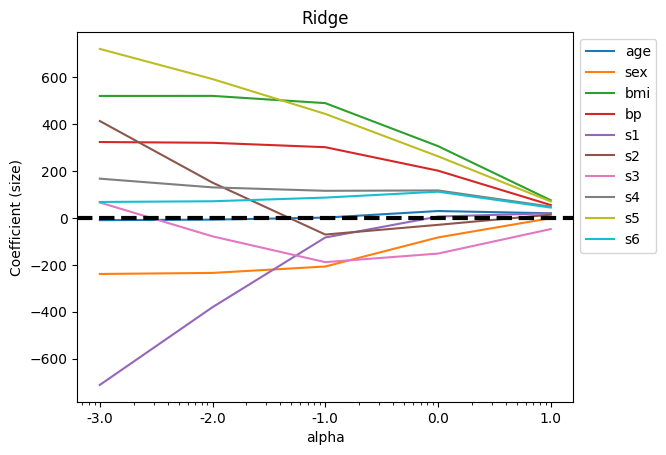

In [ ]:
import matplotlib.pyplot as plt
plt.semilogx(df_ridge) #semilogx 함수는 x축을 로그 스케일로 설정하고 선그래프를 그려주고, 그에 따라 데이터를 시각화함. 로그 스케일은 데이터 포인트 간의 간격을 균등하게 만들어
plt.xticks(alpha, labels = np.log10(alpha))
plt.legend(labels = df_ridge.columns, bbox_to_anchor= (1, 1))
plt.title('Ridge')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle = '--', color = 'black', linewidth = 3) # 회귀계수가 증가하면서 점점 0으로 수렴하고 있음

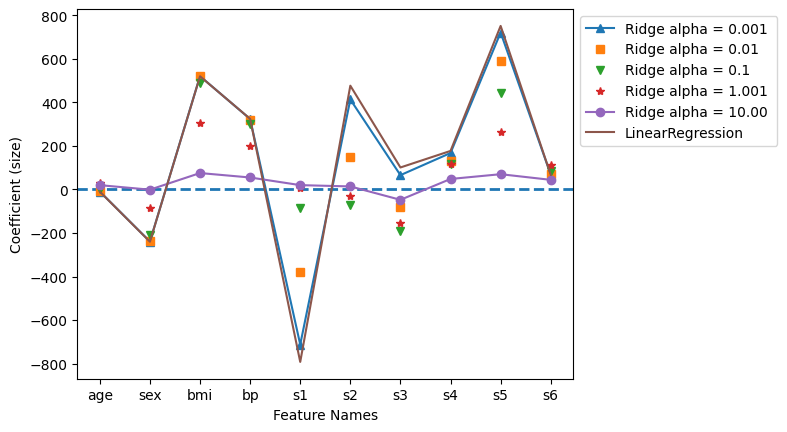

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x, y)

plt.axhline(y = 0, linestyle = '--', linewidth = 2)
plt.plot(df_ridge.loc[0.001], '^-', label = 'Ridge alpha = 0.001 ')
plt.plot(df_ridge.loc[0.01], 's', label = 'Ridge alpha = 0.01 ')
plt.plot(df_ridge.loc[0.1], 'v', label = 'Ridge alpha = 0.1 ')
plt.plot(df_ridge.loc[1.00], '*', label = 'Ridge alpha = 1.001 ')
plt.plot(df_ridge.loc[10.00], 'o-', label = 'Ridge alpha = 10.00 ')

plt.plot(lr.coef_, label = 'LinearRegression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor = (1, 1))